# NumPy基础：数组和矢量计算

+ ndarray，一个具有矢量算术运算和复杂广播能力的快速且节省空间的多维数组。
+ 用于对整数数据进行快速运算的标准数学函数（无需编写循环）
+ 用于读写磁盘数据的工具以及用于操作内存映射文件的工具
+ 线性代数、随机数生成以及傅里叶变换功能。
+ 用于集成有C、C++、Fortran等语言编写的代码的工具。

## 目录
+ NumPy的ndarray：一个多维数组对象
 + 创建ndarray
 + ndarray的重要属性
 + ndarraysd的数据类型
 + 数组与标量之间的运算
 + 基本的索引和切片
 + 数组转置和轴对换


+ 通用函数：快速的元素级数组函数
 + 一元ufunc
 + 二元ufunc


+ 利用数组进行数据处理
 + np.where：将条件逻辑表述为数组运算
 + 数学和统计方法
 + any, all：用于布尔型数组的方法
 + 排序
 + 唯一化与集合运算

    
+ 用于数组的文件输入输出
 + 将数组以二进制格式保存到磁盘
 + 存取文本文件


+ 线性代数
 + numpy函数
 + numpy.linalg模块


+ 随机数生成
 + numpy.random模块

    
+ 范例：随机漫步
 + 一次模拟多个随机漫步

In [1]:
from numpy.random import randn
import numpy as np

## NumPy的ndarray：一个多维数组对象

### 创建ndarray

+ array  
将输入数据（列表、元组、数组或其他**序列类型**）转换为ndarray。要么推断出dtype，要么显式制定dtype。默认直接复制输入数据。

In [2]:
data = [[1, 2, 3, 4], [5, 6, 7, 8]]
arr = np.array(data)
arr

array([[1, 2, 3, 4],
       [5, 6, 7, 8]])

+ asarray  
将输入转换为ndarray，如果输入本身就是一个ndarray就不进行复制

In [3]:
arr1 = np.array(arr)
arr1 is arr # np.array会复制对象，因此返回False

False

In [4]:
arr2 = np.asarray(arr)
arr2 is arr # arr本身就是一个ndarray，np.asarray不会进行复制，仅仅是映射，返回True

True

+ arange  
类似于内置的range，但返回的是一个ndarray而不是列表

In [5]:
np.arange(0, 5, 0.5) # 内置的range只能返回整数，arange可以返回浮点数

array([ 0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5])

+ ones、ones_like  
根据指定的形状和dtype创建一个全1数组。ones_like以另一个数组为参数，并根据其形状和dtype创建一个全1数组

In [6]:
np.ones((2, 3, 4), dtype = np.string_) # 创建3维数组，参数是元组的形式，并且根据dtype参数将数值1转化为字符串

array([[['1', '1', '1', '1'],
        ['1', '1', '1', '1'],
        ['1', '1', '1', '1']],

       [['1', '1', '1', '1'],
        ['1', '1', '1', '1'],
        ['1', '1', '1', '1']]], 
      dtype='|S1')

In [7]:
np.ones_like(arr) # 根据arr的维数创建全1数组

array([[1, 1, 1, 1],
       [1, 1, 1, 1]])

+ zeros、zeros_like  
类似于ones和ones_like，只不过产生的是全0数组而已

In [8]:
np.zeros((2, 3, 4), dtype = np.int8)

array([[[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]]], dtype=int8)

In [9]:
np.zeros_like(arr)

array([[0, 0, 0, 0],
       [0, 0, 0, 0]])

+ empty、emtpy_like  
创建新数组，只分配内存空间但不填充任何值

In [10]:
np.empty((2, 3, 4))

array([[[  1.95630826e-316,   3.86651980e-316,   1.94770124e-316,
           3.84512557e-316],
        [  2.19772613e-316,   3.86652217e-316,   1.94770124e-316,
           3.86648186e-316],
        [  2.19772613e-316,   3.86652454e-316,   1.94770124e-316,
           3.58921024e-316]],

       [[  2.19772613e-316,   3.86652691e-316,   1.94770124e-316,
           3.84074262e-316],
        [  2.19772613e-316,   3.86652929e-316,   1.94770124e-316,
           3.84515640e-316],
        [  2.19772613e-316,   3.84075843e-316,   1.94770124e-316,
           3.84940141e-316]]])

In [11]:
np.empty_like(arr)

array([[0, 0, 0, 0],
       [0, 0, 0, 0]])

+ eye、identity  
创建一个正方的N * N单位矩阵

In [12]:
N = 5
np.eye(N)

array([[ 1.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  1.]])

In [13]:
np.identity(N)

array([[ 1.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  1.]])

### ndarray的重要属性

In [14]:
# 生成2 * 3的2维数组，元素服从标准正态分布
data = randn(2, 3)
data

array([[ 2.61944602,  0.51285281, -0.64717234],
       [ 0.33865195, -0.05941285, -0.45428128]])

In [15]:
data.ndim # 数组的维数

2

In [16]:
data.shape # 数组各维度大小的元组,n行m列的数组，返回(n, m)

(2L, 3L)

In [17]:
data.size # 数组内元素个数

6

In [18]:
data.dtype # 数组的数据类型

dtype('float64')

In [19]:
data.itemsize # 每个元素占用字节数

8

In [20]:
data.data # 数组内存地址

<read-write buffer for 0x0000000004AA7760, size 48, offset 0 at 0x0000000004A349D0>

### ndarraysd的数据类型

| 类型        | 类型代码           | 说明  |
| ------------- |:-------------| :-----|
| int8、uint8      | i1、u1 | 有符号和无符号的8位（1个字节）整型 |
| int16、uint16     | i2、u2      |   有符号和无符号的16位（2个字节）整型 |
| int32、uint32 | i4、u4      | 有符号和无符号的32位（4个字节）整型   |
| int64、uint64 | i8、u8      | 有符号和无符号的64位（8个字节）整型   |
| float16 |  f2     | 半精度浮点数   |
| float32 |  f4或f     | 标准的单精度浮点数。与C的float兼容   |
| float64 |  f8或d     | 标准的双精度浮点数。与C的double和Python的float对象兼容   |
| float128 | f16或g      | 扩展精度浮点数   |
| complex64、complex128、conplex256 | c8、c16、c32      | 分别用两个32位、64位或128位浮点数表示的复数   |
| bool |  ?     |  储存True和False值的布尔类型  |
| object | O      |  Python对象类型  |
| string_ |   S    | 固定长度的字符串类型（每个字符1个字节）。例如，要创建一个长度为10的字符串，应使用S10   |
| unicode_ |   U    | 固定长度的unicode类型（字节数由平台决定）。跟字符串的定义方式一样（如U10）   |

+ 显示指定dtype

In [21]:
arr1 = np.array([1, 2, 3], dtype=np.float64) # 数值型dtype，np.类型名+位长，标准的双精度浮点值占用8字节（即64位）
arr1

array([ 1.,  2.,  3.])

+ 通过astype方法转换dtype

In [22]:
arr = np.array([1, 2, 3, 4, 5])
float_arr = arr.astype(np.float64)
float_arr

array([ 1.,  2.,  3.,  4.,  5.])

In [23]:
arr = np.array([3.7, -1.2, -2.6, 0.5, 12.9, 10.1])
arr.astype(np.int32) # 将浮点数转换成整数，小数部分会被截断

array([ 3, -1, -2,  0, 12, 10])

In [24]:
numeric_strings = np.array(['1.25', '-9.6', '42'], dtype=np.string_) # 如果字符串数组全是数字，可以用astype将其转换为数值形式
numeric_strings.astype(float) # float是Python内置类型，NumPy会自动将Python类型映射到等价的dtype，即np.float64

array([  1.25,  -9.6 ,  42.  ])

+ 将其他数组的dtype属性作为参数传入astype方法

In [25]:
int_array = np.arange(10)
calibers = np.array([.22, .270, .357, .380, .44, .50], dtype=np.float64)
int_array.astype(calibers.dtype) # 等价于int_array.astype(np.float64)

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9.])

+ 用简洁的类型代码表示dtype

In [26]:
empty_uint32 = np.empty(8, dtype='u4') # 等价于empty_uint32 = np.empty(8, dtype='np.uint32')
empty_uint32

array([1, 2, 3, 4, 5, 6, 7, 8], dtype=uint32)

NumPy的数据类型列表，在原书第86页

注意：astype方法会创建一个**新的数组**

### 数组与标量之间的运算

+ 大小相等的数组之间的算术运算和比较运算，运算将应用到**元素级**

In [27]:
arr = np.array([[1., 2., 3.], [4., 5., 6.]])
arr

array([[ 1.,  2.,  3.],
       [ 4.,  5.,  6.]])

In [28]:
arr * arr

array([[  1.,   4.,   9.],
       [ 16.,  25.,  36.]])

In [29]:
arr == arr

array([[ True,  True,  True],
       [ True,  True,  True]], dtype=bool)

+ 数组与标量的算术运算和比较运算，标量值将**传播**到各个**元素**

In [30]:
1 / arr

array([[ 1.        ,  0.5       ,  0.33333333],
       [ 0.25      ,  0.2       ,  0.16666667]])

In [31]:
arr != 1

array([[False,  True,  True],
       [ True,  True,  True]], dtype=bool)

### 基本的索引和切片

+ 整数索引  
 + 整数索引是原始数组的视图，数据并不会复制
 + 整数索引返回的是低维数组
 + 通过切片赋值，对数组进行修改 

In [32]:
arr3d = np.array([[[1, 2, 3], [4, 5, 6]], [[7, 8, 9], [10, 11, 12]]]) # 3维数组
arr3d

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

In [33]:
arr3d[0] # 2维数组

array([[1, 2, 3],
       [4, 5, 6]])

In [34]:
arr3d[0][0]

array([1, 2, 3])

In [35]:
arr3d[0, 0] # 以上两种方式等价，返回1维数组

array([1, 2, 3])

In [36]:
old_values = arr3d[0].copy() # 如果想要得到切片副本，使用.copy()方法
old_values

array([[1, 2, 3],
       [4, 5, 6]])

In [37]:
arr3d[0] = 42 # 利用整数索引赋值，对数组进行修改
arr3d

array([[[42, 42, 42],
        [42, 42, 42]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

In [38]:
arr3d[0] = old_values # 利用整数索引赋值，恢复原数组
arr3d

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

+ 切片索引
 + 整数索引是原始数组的视图，数据并不会复制

In [39]:
arr2d = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
arr2d

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [40]:
arr2d[:2] # 单独使用切片索引，不降维；切片可以没有逗号，按第一维进行切片

array([[1, 2, 3],
       [4, 5, 6]])

In [41]:
arr2d[:2, 1:] # 先按0轴切片，再按1轴切片；切片中有逗号，先后按第一、二维进行切片

array([[2, 3],
       [5, 6]])

In [42]:
arr2d[1, :2] # 整数索引与切片索引混用，降维

array([4, 5])

In [43]:
arr2d[1:2, :2] # 在不降维的情况下，选取单行数组

array([[4, 5]])

In [44]:
arr2d[:, :1] # 只有冒号，选取整个轴，即对该轴不切片；想要只按第二维进行切片，则加入冒号和逗号

array([[1],
       [4],
       [7]])

In [45]:
arr2d[:2, 1:] = 0 # 利用切片索引修改数组
arr2d

array([[1, 0, 0],
       [4, 0, 0],
       [7, 8, 9]])

+ 布尔型索引
 + 布尔型索引总是创建数据的副本

In [46]:
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])
names

array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'], 
      dtype='|S4')

In [47]:
names1 = np.array(['Bob', 'Joe', 'Will', 'Bob'])
names1

array(['Bob', 'Joe', 'Will', 'Bob'], 
      dtype='|S4')

In [48]:
data = randn(7, 4)
data

array([[ 0.36500734,  0.30252798,  0.21748181,  1.51790932],
       [ 0.33822658, -0.84734238, -1.23583344,  2.21714887],
       [-0.86229199, -2.94517863,  0.03760171, -0.42486437],
       [-0.04933184, -2.05166287,  0.6099494 , -0.62897303],
       [ 0.63079571, -0.2411596 ,  0.16981678,  0.68157878],
       [-0.49798497,  0.08874844, -0.21000199, -1.23604449],
       [-1.67022542, -0.53583471,  0.93821317, -1.44301963]])

In [49]:
data[names == 'Bob'] # 布尔型数组的长度跟被索引的轴长度一致，按行索引；没有逗号，只按第一维索引（即按行索引）

array([[ 0.36500734,  0.30252798,  0.21748181,  1.51790932],
       [-0.04933184, -2.05166287,  0.6099494 , -0.62897303]])

In [50]:
data[:, names1 == 'Bob'] # 按列索引；有逗号，则按第一、二维索引

array([[ 0.36500734,  1.51790932],
       [ 0.33822658,  2.21714887],
       [-0.86229199, -0.42486437],
       [-0.04933184, -0.62897303],
       [ 0.63079571,  0.68157878],
       [-0.49798497, -1.23604449],
       [-1.67022542, -1.44301963]])

In [51]:
data[names != 'Bob']

array([[ 0.33822658, -0.84734238, -1.23583344,  2.21714887],
       [-0.86229199, -2.94517863,  0.03760171, -0.42486437],
       [ 0.63079571, -0.2411596 ,  0.16981678,  0.68157878],
       [-0.49798497,  0.08874844, -0.21000199, -1.23604449],
       [-1.67022542, -0.53583471,  0.93821317, -1.44301963]])

In [52]:
data[~(names == 'Bob')] # 以上两种方式等价；在索引中，~表示否定，选取False

array([[ 0.33822658, -0.84734238, -1.23583344,  2.21714887],
       [-0.86229199, -2.94517863,  0.03760171, -0.42486437],
       [ 0.63079571, -0.2411596 ,  0.16981678,  0.68157878],
       [-0.49798497,  0.08874844, -0.21000199, -1.23604449],
       [-1.67022542, -0.53583471,  0.93821317, -1.44301963]])

In [53]:
mask = (names == 'Bob') | (names == 'Will') # Python关键字and和or在布尔型数组中无效，使用 & 和 |
mask

array([ True, False,  True,  True,  True, False, False], dtype=bool)

In [54]:
data[mask] # 布尔条件的组合索引

array([[ 0.36500734,  0.30252798,  0.21748181,  1.51790932],
       [-0.86229199, -2.94517863,  0.03760171, -0.42486437],
       [-0.04933184, -2.05166287,  0.6099494 , -0.62897303],
       [ 0.63079571, -0.2411596 ,  0.16981678,  0.68157878]])

In [55]:
data[data < 0] = 0 # 利用与原数组shape相同的布尔型索引修改数组
data

array([[ 0.36500734,  0.30252798,  0.21748181,  1.51790932],
       [ 0.33822658,  0.        ,  0.        ,  2.21714887],
       [ 0.        ,  0.        ,  0.03760171,  0.        ],
       [ 0.        ,  0.        ,  0.6099494 ,  0.        ],
       [ 0.63079571,  0.        ,  0.16981678,  0.68157878],
       [ 0.        ,  0.08874844,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.93821317,  0.        ]])

In [56]:
data[names != 'Joe'] = 7 # 利用一维布尔型索引修改数组
data

array([[ 7.        ,  7.        ,  7.        ,  7.        ],
       [ 0.33822658,  0.        ,  0.        ,  2.21714887],
       [ 7.        ,  7.        ,  7.        ,  7.        ],
       [ 7.        ,  7.        ,  7.        ,  7.        ],
       [ 7.        ,  7.        ,  7.        ,  7.        ],
       [ 0.        ,  0.08874844,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.93821317,  0.        ]])

+ 花式索引（整数数组索引）
 + 以特定顺序选取行列子集
 + 花式索引总是创建数据的副本

In [57]:
arr = np.empty((8, 4))
for i in range(8):
    arr[i] = i # 创建数组
arr

array([[ 0.,  0.,  0.,  0.],
       [ 1.,  1.,  1.,  1.],
       [ 2.,  2.,  2.,  2.],
       [ 3.,  3.,  3.,  3.],
       [ 4.,  4.,  4.,  4.],
       [ 5.,  5.,  5.,  5.],
       [ 6.,  6.,  6.,  6.],
       [ 7.,  7.,  7.,  7.]])

In [58]:
arr[[4, 3, 0, 6]] # 以特定顺序选取行子集；双中括号不降维

array([[ 4.,  4.,  4.,  4.],
       [ 3.,  3.,  3.,  3.],
       [ 0.,  0.,  0.,  0.],
       [ 6.,  6.,  6.,  6.]])

In [59]:
arr[[-3, -5, -7]] # 使用负数索引从末尾选取行

array([[ 5.,  5.,  5.,  5.],
       [ 3.,  3.,  3.,  3.],
       [ 1.,  1.,  1.,  1.]])

In [60]:
arr = np.arange(32).reshape((8, 4))
arr

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23],
       [24, 25, 26, 27],
       [28, 29, 30, 31]])

In [61]:
arr[[1, 5, 7, 2], [0, 3, 1, 2]] # 这样返回的是元素(1, 0), (5, 3), (7, 1), (2, 2)

array([ 4, 23, 29, 10])

In [62]:
arr[[1, 5, 7, 2]][:, [0, 3, 1, 2]]

array([[ 4,  7,  5,  6],
       [20, 23, 21, 22],
       [28, 31, 29, 30],
       [ 8, 11,  9, 10]])

In [63]:
arr[np.ix_([1, 5, 7, 2], [0, 3, 1, 2])] # 以上两种方式等价，选取数组内的方形区域

array([[ 4,  7,  5,  6],
       [20, 23, 21, 22],
       [28, 31, 29, 30],
       [ 8, 11,  9, 10]])

### 数组转置和轴对换
转置和轴对换返回源数据的视图，数据并不会复制

+ T属性，转置

In [64]:
arr = np.arange(15).reshape((3, 5))
arr.T

array([[ 0,  5, 10],
       [ 1,  6, 11],
       [ 2,  7, 12],
       [ 3,  8, 13],
       [ 4,  9, 14]])

+ transpose方法，转置

In [65]:
arr = np.arange(16).reshape((2, 2, 4))
arr

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7]],

       [[ 8,  9, 10, 11],
        [12, 13, 14, 15]]])

In [66]:
arr.transpose((1, 0, 2)) # 传入轴编号组成的元组，按照轴编号的排列重塑数组

array([[[ 0,  1,  2,  3],
        [ 8,  9, 10, 11]],

       [[ 4,  5,  6,  7],
        [12, 13, 14, 15]]])

In [67]:
arr.T

array([[[ 0,  8],
        [ 4, 12]],

       [[ 1,  9],
        [ 5, 13]],

       [[ 2, 10],
        [ 6, 14]],

       [[ 3, 11],
        [ 7, 15]]])

In [68]:
arr.transpose((2, 1, 0)) # 以上两种方式等价

array([[[ 0,  8],
        [ 4, 12]],

       [[ 1,  9],
        [ 5, 13]],

       [[ 2, 10],
        [ 6, 14]],

       [[ 3, 11],
        [ 7, 15]]])

+ swapaxes方法，轴对换

In [69]:
arr.swapaxes(1, 2) # 1、2轴对换

array([[[ 0,  4],
        [ 1,  5],
        [ 2,  6],
        [ 3,  7]],

       [[ 8, 12],
        [ 9, 13],
        [10, 14],
        [11, 15]]])

## 通用函数：快速的元素级数组函数

+ 通用函数（ufunc）都是NumPy的**顶级函数**，是一种对ndarray中的数据执行元素级运算的函数。
+ 可以将其看作简单函数（接受一个或多个标量值，并产生一个或多个标量值）的矢量化包装器。

### 一元ufunc

+ abs、fabs  
计算整数、浮点数或复数的绝对值。对于非复数值，可以使用更快的fabs
+ sqrt  
计算各元素的平方根。相当于arr ** 0.5
+ square  
计算各元素的平方。相当于arr ** 2
+ exp  
计算各元素的指数e ** x
+ log、log10、log2、log1p  
分别为自然对数（底数为e）、底数为10的log、底数为2的log、log(1+x)
+ sign  
计算各元素的正负号：1（正数）、0（零）、-1（负数）
+ ceil  
计算各元素的ceiling值，即大于等于该值的最小整数
+ floor  
计算各元素的floor值，即小于等于该值的最大整数
+ rint  
将各元素值四舍五入到最接近的整数，保留dtype
+ modf  
将数组的小数和整数部分以两个独立数组的形式返回
+ isnan  
返回一个表示“哪些值是NaN（这不是一个数字）”的布尔型数组
+ isfinite、isinf  
分别返回一个表示“哪些元素是有穷的（非inf，非NaN）”或“哪些元素是无穷的”的布尔型数组
+ cos、cosh、sin、sinh、tan、tanh  
普通型和双曲型三角函数
+ arccos、arccosh、arcsin、arcsinh、arctan、arctanh  
反三角函数
+ logical_not  
计算各元素not x的真值。相当于-arr

In [70]:
arr = np.arange(10)
np.sqrt(arr)

array([ 0.        ,  1.        ,  1.41421356,  1.73205081,  2.        ,
        2.23606798,  2.44948974,  2.64575131,  2.82842712,  3.        ])

In [71]:
np.exp(arr)

array([  1.00000000e+00,   2.71828183e+00,   7.38905610e+00,
         2.00855369e+01,   5.45981500e+01,   1.48413159e+02,
         4.03428793e+02,   1.09663316e+03,   2.98095799e+03,
         8.10308393e+03])

In [72]:
arr = randn(7) * 5
arr

array([-0.41308839, -3.45882656,  0.30989857,  2.49747565,  2.6463387 ,
       -1.26285113, -1.98921474])

In [73]:
np.modf(arr) # 返回由两个数组构成的元组

(array([-0.41308839, -0.45882656,  0.30989857,  0.49747565,  0.6463387 ,
        -0.26285113, -0.98921474]), array([-0., -3.,  0.,  2.,  2., -1., -1.]))

### 二元ufunc

+ add  
将数组中对应的元素相加
+ subtract  
从第一个数组中减去第二个数组中的元素
+ multiply  
数组元素相乘
+ divide、floor_divide  
除法或向下圆整除法（丢弃余数）
+ power  
对第一个数组中的元素A，根据第二个数组中的相应元素B，计算A ** B
+ maximum、fmax  
元素级的最大值计算。fmax将忽略NaN
+ minimum、fmin  
元素级的最小值计算。fmin将忽略NaN
+ mod  
元素级的求模计算（除法的余数）
+ copysign  
将第二个数组中的值的符号复制给第一个数组中的值
+ greater、greater_equal、less、less_equal、equal、not_equal  
执行元素级的比较运算，最终产生布尔型数组。相当于中缀运算符>、>=、<、<=、==、!=
+ logical_and、logical_or、logical_xor  
执行元素级的真值逻辑运算。相当于中缀运算符&、|、^（异或）

In [74]:
x = randn(8)
y = randn(8)
x, y

(array([ 0.20725064, -1.83943749,  0.04499501,  0.64148361, -1.84246619,
        -0.07302458, -0.60234676, -2.07251363]),
 array([ 0.8858014 ,  0.50871517,  0.23088971,  1.42490107, -0.52087804,
        -0.5187032 ,  1.24660707,  0.08249876]))

In [75]:
np.maximum(x, y)

array([ 0.8858014 ,  0.50871517,  0.23088971,  1.42490107, -0.52087804,
       -0.07302458,  1.24660707,  0.08249876])

## 利用数组进行数据处理

### np.where：将条件逻辑表述为数组运算

np.where函数是三元表达式x if condition else y的矢量化版本

+ 3个参数是等长数组

In [76]:
xarr = np.array([1.1, 1.2, 1.3, 1.4, 1.5])
yarr = np.array([2.1, 2.2, 2.3, 2.4, 2.5])
cond = np.array([True, False, True, True, False])

In [77]:
result = [(x if c else y)
          for x, y, c in zip(xarr, yarr, cond)]
result

[1.1000000000000001, 2.2000000000000002, 1.3, 1.3999999999999999, 2.5]

In [78]:
result = np.where(cond, xarr, yarr) # 以上两种方式等价，cond值为True时，选取xarr的值，否则选取yarr的值
result

array([ 1.1,  2.2,  1.3,  1.4,  2.5])

+ 第2、3个参数不是数组，用于根据另一个数组产生一个新的数组

In [79]:
arr = randn(4, 4)
arr

array([[-0.02564568,  1.35821718, -0.20947704, -1.25218089],
       [-0.21938282, -0.4786935 , -0.11440673, -0.79357692],
       [-0.26683798,  0.00721901, -0.33810263,  1.40485558],
       [-1.33559877, -0.57900868, -2.50237571,  0.48548505]])

In [80]:
np.where(arr > 0, 2, -2)

array([[-2,  2, -2, -2],
       [-2, -2, -2, -2],
       [-2,  2, -2,  2],
       [-2, -2, -2,  2]])

In [81]:
np.where(arr > 0, 2, arr) # 只将正值设置为2

array([[-0.02564568,  2.        , -0.20947704, -1.25218089],
       [-0.21938282, -0.4786935 , -0.11440673, -0.79357692],
       [-0.26683798,  2.        , -0.33810263,  2.        ],
       [-1.33559877, -0.57900868, -2.50237571,  2.        ]])

+ 嵌套的where表达式

In [82]:
cond1 = np.array([False, False, True, False, True])
cond2 = np.array([True, False, False, True, False])

In [83]:
result = []
for i in range(len(cond1)):
    if cond1[i] and cond2[i]:
        result.append(0)
    elif cond1[i]:
        result.append(1)
    elif cond2[i]:
        result.append(2)
    else:
        result.append(3)
result

[2, 3, 1, 2, 1]

In [84]:
np.where(cond1 & cond2, 0,
         np.where(cond1, 1,
                  np.where(cond2, 2, 3))) # 以上两种方式等价

array([2, 3, 1, 2, 1])

### 数学和统计方法

+ sum  
对数组中全部或某轴向的元素求和。零长度的数组的sum为0
+ mean  
算术平均数。零长度的数组的mean为NaN
+ std、var  
分别为标准差和方差，自由度可调（默认为n）
+ min、max  
最大值和最小值
+ argmin、argmax  
分别为排在第一个的最大和最小元素的索引
+ cumsum  
所有元素的累计和
+ cumprod  
所有元素的累计积

In [85]:
arr = np.random.randn(5, 4)
arr

array([[-0.49834218, -0.85626571, -1.09607239,  0.56899632],
       [-1.75566584,  1.16315487, -1.03124507,  0.03414199],
       [ 0.79011418, -1.8143928 ,  0.3591387 , -0.240595  ],
       [-0.08124013, -0.41158156,  2.01909405, -1.19292641],
       [-0.59491177,  1.43741011,  1.56301181, -0.79553903]])

In [86]:
arr.mean()

-0.12168579328687516

In [87]:
np.mean(arr) # 既是方法，也是顶级函数，返回标量值

-0.12168579328687516

In [88]:
arr.mean(axis=1) # 接受axis = 1参数，按行计算统计值，返回少一维的数组，0为列，1为行

array([-0.47042099, -0.39740352, -0.22643373,  0.08333649,  0.40249278])

In [89]:
arr.sum(0) # 可以不输入axis = 参数名，按列计算统计值

array([-2.14004574, -0.48167509,  1.81392709, -1.62592214])

In [90]:
arr = np.array([[0, 1, 2], [3, 4, 5], [6, 7, 8]])
arr

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [91]:
arr.cumsum(0)

array([[ 0,  1,  2],
       [ 3,  5,  7],
       [ 9, 12, 15]])

In [92]:
arr.cumprod(1) # cumsum、cumprod之类的方法不聚合，返回由中间结果组成的数组

array([[  0,   0,   0],
       [  3,  12,  60],
       [  6,  42, 336]])

### any, all：用于布尔型数组的方法

In [93]:
arr = randn(100)
(arr > 0).sum() # 布尔值会被转换为1（True）和0（False），sum用于对布尔型数组中的True值计数

48

In [94]:
bools = np.array([False, False, True, False]).reshape(2, 2)
bools

array([[False, False],
       [ True, False]], dtype=bool)

In [95]:
bools.any() # any检查整个数组中是否存在True

True

In [96]:
bools.any(0) # 检查每列中是否存在True

array([ True, False], dtype=bool)

In [97]:
bools.any(1) # 检查每行中是否存在True

array([False,  True], dtype=bool)

In [98]:
bools.all() # all检测整个数组中是否全为True

False

### 排序

+ sort方法就地排序

In [99]:
arr = randn(8)
arr

array([ 0.1737478 ,  0.04011146, -0.3489737 , -0.50747262, -0.83202677,
        0.20183228,  1.1809926 , -0.02612075])

In [100]:
arr.sort()
arr

array([-0.83202677, -0.50747262, -0.3489737 , -0.02612075,  0.04011146,
        0.1737478 ,  0.20183228,  1.1809926 ])

In [101]:
arr = randn(5, 3)
arr

array([[-0.06583483,  1.52712891,  0.81103274],
       [ 1.0617139 , -1.16818809,  0.49337766],
       [-0.75988098, -1.39305294, -1.02151848],
       [ 1.01386242,  0.28054317, -1.35817294],
       [-0.22403719, -0.89314143,  1.17427466]])

In [102]:
arr.sort(1) # 多维数组可以在某一轴上排序
arr

array([[-0.06583483,  0.81103274,  1.52712891],
       [-1.16818809,  0.49337766,  1.0617139 ],
       [-1.39305294, -1.02151848, -0.75988098],
       [-1.35817294,  0.28054317,  1.01386242],
       [-0.89314143, -0.22403719,  1.17427466]])

+ np.sort函数返回数组排序后的副本

In [103]:
arr = randn(8)
arr

array([ 1.63029816,  0.16227418,  0.41996972,  0.48562972,  1.777026  ,
        2.8643341 , -0.80974526, -0.77779174])

In [104]:
np.sort(arr)

array([-0.80974526, -0.77779174,  0.16227418,  0.41996972,  0.48562972,
        1.63029816,  1.777026  ,  2.8643341 ])

+ 利用排序计算数组分位数

In [105]:
large_arr = randn(1000)
large_arr.sort() # 先对数组进行就地排序（升序）

In [106]:
large_arr[int(0.05 * len(large_arr))] # 5%分位数

-1.6785563175142182

### 唯一化与集合运算

+ 集合运算都是NumPy的顶级函数

+ unique(x)  
计算x中的唯一元素，并返回有序结果
+ intersect1d(x, y)  
计算x和y中的公共元素，并返回有序结果
+ union1d(x, y)  
计算x和y的并集，并返回有序结果
+ in1d(x, y)  
得到一个表示“x的元素是否包含于y”的布尔型数组
+ setdiff1d(x, y)  
集合的差，即元素在x中且不在y中
+ setxor1d(x, y)  
集合的对称差，即存在于一个数组中但不同时存在于两个数组中的元素（异或）

In [107]:
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])
np.unique(names)

array(['Bob', 'Joe', 'Will'], 
      dtype='|S4')

In [108]:
sorted(set(names)) # 等价的纯Python代码

['Bob', 'Joe', 'Will']

In [109]:
values = np.array([6, 0, 0, 3, 2, 5, 6])
np.in1d(values, [2, 3, 6])

array([ True, False, False,  True,  True, False,  True], dtype=bool)

## 用于数组的文件输入输出

### 将数组以二进制格式保存到磁盘

+ np.save  
默认情况下，数组以未压缩的原始二进制格式保存在扩展名为**.npy**的文件中

In [110]:
arr = np.arange(10)
np.save('./data/ch04/some_array', arr) # 文件路径末尾没有.npy，会被自动加上

+ np.load  
读取磁盘上的数组

In [111]:
np.load('./data/ch04/some_array.npy')

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

+ np.savez  
将多个数组保存到一个扩展名为**.npz**的压缩文件中，数组以关键字参数的形式传入

In [112]:
np.savez('./data/ch04/some_array_archive.npz', a=arr, b=arr)

In [113]:
arch = np.load('./data/ch04/some_array_archive.npz') # 加载.npz文件，会得到一个类似字典的对象
arch['b'] # 通过关键字参数的键来读取数组

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

### 存取文本文件

+ np.savetxt  
将数组写到以某种分隔符隔开的文本文件中

In [114]:
np.savetxt('./data/ch04/some_array_ex.txt', arr)

+ np.loadtxt  
可以指定各种分隔符、针对特定列的转换器函数、需要跳过的函数等

In [115]:
arr = np.loadtxt('./data/ch04/some_array_ex.txt', delimiter=',') # delimiter参数设置分隔符
arr

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9.])

## 线性代数

### numpy函数
+ diag  
以一维数组的形式返回方阵的对角线（或非对角线）元素，或将一维数组转换为方阵（非对角线元素为0）
+ dot  
矩阵乘法
+ trace  
计算对角线元素的和

In [116]:
x = np.array([[1., 2., 3.], [4., 5., 6.]])
x

array([[ 1.,  2.,  3.],
       [ 4.,  5.,  6.]])

In [117]:
y = np.array([[6., 23.], [-1, 7], [8, 9]])
y

array([[  6.,  23.],
       [ -1.,   7.],
       [  8.,   9.]])

In [118]:
x.dot(y)

array([[  28.,   64.],
       [  67.,  181.]])

In [119]:
np.dot(x, y) # 以上两种方式等价

array([[  28.,   64.],
       [  67.,  181.]])

In [120]:
np.dot(x, np.ones(3)) # 矩阵与向量相乘

array([  6.,  15.])

### numpy.linalg模块
+ det  
计算矩阵行列式
+ eig  
计算方阵的本征值和本征向量
+ inv  
计算方阵的逆
+ pinv  
计算矩阵的Moore-Penrose伪逆
+ qr  
计算QR分解
+ svd  
计算奇异值分解（SVD）
+ solve  
解线性方程组Ax = b，其中A为一个方阵
+ lstsq  
计算Ax = b的最小二乘解


In [121]:
from numpy.linalg import inv, qr
X = randn(5, 5)
X

array([[-0.73837097,  0.28174978, -1.74512174,  0.37745827,  0.87508199],
       [-1.47430285,  0.69356149, -0.33516754,  0.70997336, -0.9296247 ],
       [ 0.13633935, -1.50015217,  1.72183173, -1.13364725,  0.85130604],
       [-1.63604067,  0.49330855, -0.03309101, -0.623156  , -0.0122295 ],
       [ 0.37011029,  0.56647206, -1.05881181,  0.05015962, -0.74018756]])

In [122]:
mat = X.T.dot(X) # 矩阵乘法
mat

array([[ 5.55095969, -2.03250102,  1.67970021, -0.44190756,  0.58653666],
       [-2.03250102,  3.37511093, -3.92326795,  2.02040819, -2.10061483],
       [ 1.67970021, -3.92326795,  7.24466911, -2.88110919,  1.03438519],
       [-0.44190756,  2.02040819, -2.88110919,  2.3225324 , -1.32428923],
       [ 0.58653666, -2.10061483,  1.03438519, -1.32428923,  2.90271973]])

In [123]:
inv(mat) # 求逆

array([[ 0.35162638,  0.82781448,  0.2756283 , -0.08953296,  0.38894704],
       [ 0.82781448,  4.53764677,  1.89631069, -0.06189342,  2.41250438],
       [ 0.2756283 ,  1.89631069,  1.10298412,  0.40233792,  1.10711812],
       [-0.08953296, -0.06189342,  0.40233792,  1.17521285,  0.36608752],
       [ 0.38894704,  2.41250438,  1.10711812,  0.36608752,  1.78426801]])

In [124]:
mat.dot(inv(mat)) # 返回单位阵

array([[  1.00000000e+00,   4.44089210e-16,  -1.11022302e-16,
         -1.38777878e-16,  -2.22044605e-16],
       [ -3.33066907e-16,   1.00000000e+00,  -8.88178420e-16,
         -3.33066907e-16,   0.00000000e+00],
       [  5.55111512e-17,   4.44089210e-16,   1.00000000e+00,
         -5.55111512e-17,   8.88178420e-16],
       [  1.11022302e-16,   4.44089210e-16,  -6.66133815e-16,
          1.00000000e+00,  -8.88178420e-16],
       [  0.00000000e+00,  -8.88178420e-16,   4.44089210e-16,
          2.22044605e-16,   1.00000000e+00]])

In [125]:
q, r = qr(mat) # QR分解
q, r

(array([[-0.8968934 , -0.40990933,  0.01953504,  0.11308243,  0.11994716],
        [ 0.32840029, -0.4298701 , -0.25176331,  0.30076201,  0.74399086],
        [-0.27139668,  0.60523537, -0.63138076, -0.21171277,  0.34142353],
        [ 0.07140098, -0.37707994, -0.02389377, -0.91618549,  0.11289752],
        [-0.09476935,  0.37240691,  0.73281719, -0.11196616,  0.5502494 ]]),
 array([[-6.18909639,  4.33941907, -5.06483551,  2.13310319, -1.86627649],
        [ 0.        , -4.53635754,  6.85432145, -3.80007505,  2.86896694],
        [ 0.        ,  0.        , -2.72674098,  0.27582362,  2.04603004],
        [ 0.        ,  0.        ,  0.        , -0.81193726,  0.1038375 ],
        [ 0.        ,  0.        ,  0.        ,  0.        ,  0.30838943]]))

## 随机数生成

### numpy.random模块
+ seed  
确定随机数生成器的种子
+ permutation  
返回一个序列的随机排列或返回一个随机排列的范围
+ shuffle  
对一个序列就地随机排列
+ rand  
产生均匀分布的样本值
+ randint  
从给定的上下限范围内随机选取整数
+ randn  
产生正态分布（平均值为0，标准差为1）的样本值，类似于MATLAB接口
+ binomial  
产生二项分布的样本值
+ normal  
产生正态（高斯）分布的样本值
+ beta  
产生Beta分布的样本值
+ chisquare  
产生卡方分布的样本值
+ gamma  
产生Gamma分布的样本值
+ uniform  
产生在[0, 1)中均匀分布的样本值

In [126]:
samples = np.random.normal(size=(4, 4)) # 产生标准正态分布的4 * 4样本数组
samples

array([[-1.4995464 ,  1.29649796, -0.85135062, -0.26672194],
       [-1.37228497, -0.02825433, -0.03155046,  0.22939946],
       [ 0.58945495,  2.81129822, -0.77264084, -0.27409189],
       [-2.2037048 , -0.61358449, -0.28770217,  0.25510283]])

In [127]:
np.random.randn(4, 4) # 产生标准正态分布的4 * 4样本数组

array([[ 2.21047637,  0.65098855, -0.67818653,  3.07387483],
       [-0.42997057, -0.65124204,  0.46532538,  1.00333631],
       [-0.65550571, -0.21816793, -1.32781128, -0.38701414],
       [ 0.46211408,  1.11715406, -2.39894015, -0.51229134]])

In [128]:
from random import normalvariate
N = 1000000
%timeit samples = [normalvariate(0, 1) for _ in xrange(N)]

1 loops, best of 3: 901 ms per loop


In [129]:
%timeit np.random.normal(size=N) # 产生大量样本值的情况下，numpy.random比纯Python快几个数量级

10 loops, best of 3: 39.3 ms per loop


## 范例：随机漫步

In [130]:
from pandas import DataFrame, Series
%matplotlib inline

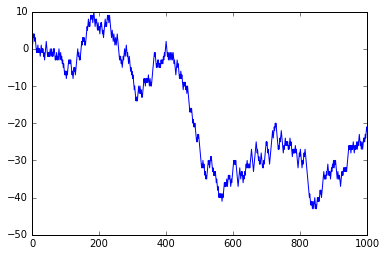

In [131]:
# 纯Python代码
import random
position = 0
walk = [position]
steps = 1000
for i in xrange(steps):
    step = 1 if random.randint(0, 1) else -1
    position += step
    walk.append(position)
Series(walk).plot();

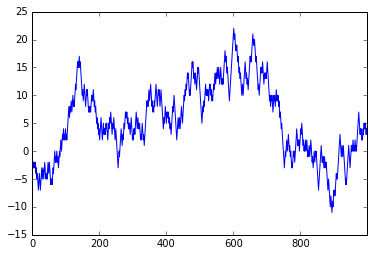

In [132]:
# numpy.random代码
nsteps = 1000
draws = np.random.randint(0, 2, size=nsteps)
steps = np.where(draws > 0, 1, -1)
walk = steps.cumsum()
Series(walk).plot();

In [133]:
walk.min()
walk.max() # 对随机漫步的统计工作

22

In [134]:
(np.abs(walk) >= 10).argmax() # 得到本次随机漫步需要多久，才能距离0点至少10步远

121

### 一次模拟多个随机漫步

In [135]:
nwalks = 10 # 10个随机漫步
nsteps = 1000
draws = np.random.randint(0, 2, size=(nsteps, nwalks)) # 0 or 1
steps = np.where(draws > 0, 1, -1)
walks = steps.cumsum(0)

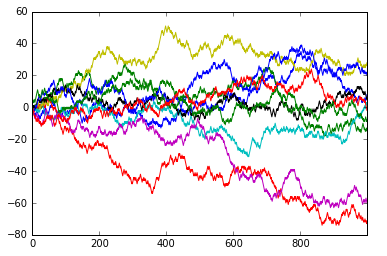

In [136]:
DataFrame(walks).plot(legend=False);

In [137]:
walks.max()
walks.min()

-74

In [138]:
hits30 = (np.abs(walks) >= 30).any(0)
hits30.sum() # 到达30或-30的随机漫步数量

6

In [139]:
hits30

array([ True, False,  True,  True,  True,  True, False,  True, False, False], dtype=bool)

In [140]:
crossing_times = (np.abs(walks[:, hits30]) >= 30).argmax(0)
crossing_times.mean() # 穿越了30步的随机漫步，所用穿越时间的均值

499.0

In [141]:
steps = np.random.normal(loc=0, scale=0.25,
                         size=(nsteps, nwalks)) # 用指定均值和标准差的正态分布生成随机漫步